In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv(r"D:\upgrad data engineer\data\smartphones - smartphones.csv")

In [7]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1020, 11)


In [8]:
# checking the first five rows of the dataset
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [10]:
df.isnull().sum()

model          0
price          0
rating       141
sim            0
processor      0
ram            0
battery        0
display        0
camera         1
card           7
os            17
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df['price'] = df['price'].str.replace('₹','').str.replace(',','').astype('int64')

In [13]:
df[['ram', 'storge']] = df.ram.str.split(",", expand = True)
df['storge']=df['storge'].str.replace('inbuilt','')
print(df)

                                model  price  rating  \
0                       OnePlus 11 5G  54999    89.0   
1           OnePlus Nord CE 2 Lite 5G  19989    81.0   
2               Samsung Galaxy A14 5G  16499    75.0   
3                Motorola Moto G62 5G  14999    81.0   
4                  Realme 10 Pro Plus  24999    82.0   
...                               ...    ...     ...   
1015       Motorola Moto Edge S30 Pro  34990    83.0   
1016                      Honor X8 5G  14990    75.0   
1017  POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0   
1018             Motorola Moto G91 5G  19990    80.0   
1019           Samsung Galaxy M52s 5G  24990    74.0   

                                                    sim  \
0               Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4                    Dual Sim, 3

In [14]:
df['processor'] = df['processor'].apply(lambda x:x.split()[0])

In [15]:
df['company'] = df['model'].apply(lambda x:x.split()[0])

## Start EDA

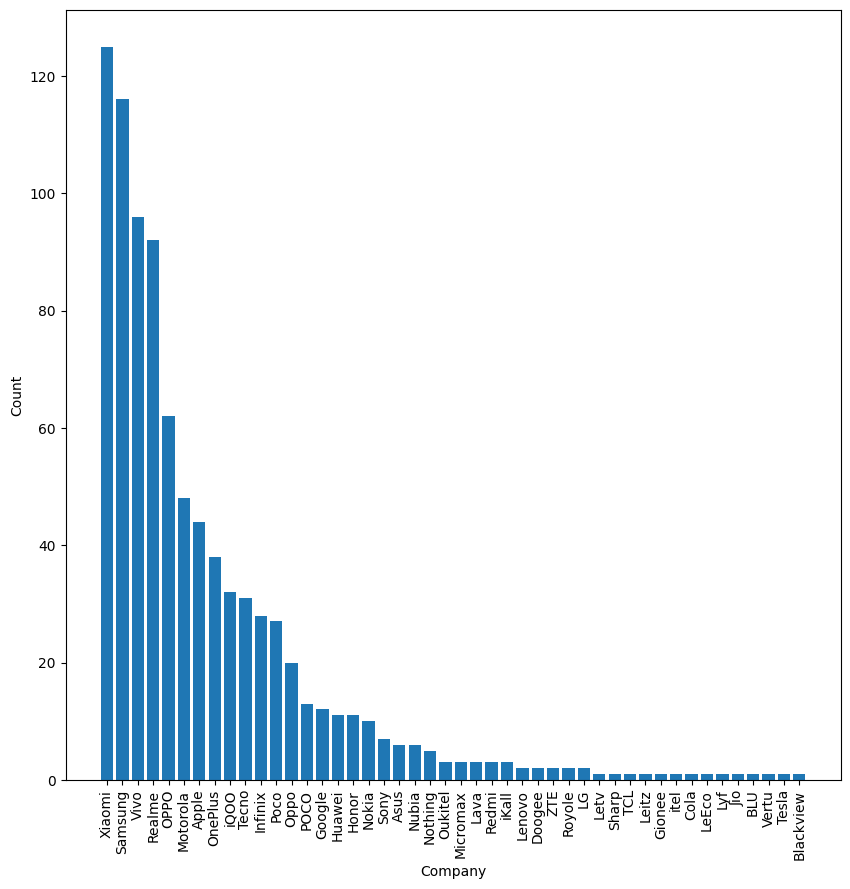

<Figure size 1000x2600 with 0 Axes>

In [16]:
# Count the number of occurrences of each company and store it in a new DataFrame
plt.figure(figsize=(10,10))

company_counts = df['company'].value_counts().reset_index()

# Rename the columns to 'company' and 'count'
company_counts.columns = ['company', 'count']

# Create a bar plot
plt.bar(company_counts['company'], company_counts['count'])

plt.xlabel('Company')
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.figure(figsize=(10,26))
plt.show()


In [17]:
Company = df['company'].value_counts()
fig = px.bar(y=Company.values, 
             x=Company.index, 
             color = Company.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Company.values,
             title= 'Company distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

In [18]:
Processor = df['processor'].value_counts()
fig = px.bar(y=Processor.values, 
             x=Processor.index, 
             color = Processor.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Processor.values,
             title= 'Processor distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Processor",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

fig.show()

In [19]:
Rating = df['rating'].value_counts()
fig = px.bar(y=Rating.values, 
             x=Rating.index, 
             color = Rating.index,
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=Rating.values,
             title= 'Rating distribution',
             template= 'plotly_dark',
             width=1500, height=500)
fig.update_layout(
    xaxis_title="Rating",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

In [20]:
fig=px.box(data_frame=df,y="price",x="company",color="company",color_discrete_sequence=["darkred","fuchsia","green","red","lightblue","darkorchid","gold","palegreen"],
          width=1500, height=500)
fig.update_layout(template="plotly_dark") 
fig.show()

In [21]:
fig=px.box(data_frame=df,y="price",x="processor",color="processor",color_discrete_sequence=["darkred","fuchsia","green","red","lightblue","darkorchid","gold","palegreen"],
          width=1500, height=500)
fig.update_layout(template="plotly_dark")                        
fig.show()

In [22]:
fig=px.scatter(df, y="rating",x="price",color_discrete_sequence=["#B0E471"],
               title="<b>Relationship between Rating and Price",
               width=750, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [23]:
fig=px.histogram(df,x="company",color="ram",title="<b>Count of Ram for every mobile company",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1500, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [24]:
fig=px.histogram(df,x="company",color="storge",title="<b>Count of ROM(storge) for every mobile company",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1500, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()

In [25]:
fig=px.histogram(df,x="company",color="processor",title="<b>Count of Processor for every mobile company",
                color_discrete_sequence=px.colors.qualitative.Vivid,
                width=1500, height=500)
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.show()